In [55]:
import pandas as pd
import numpy as np
#np.set_printoptions(threshold=np.inf)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [56]:
df = pd.read_csv('D:/data_protein.csv')
df_1 = df[df['amino_name'] != 'PRO']
df_new = df_1[df_1['amino_name'] != 'GLY']

In [57]:
count_list = []
for i in range(36):
    for j in range(36):
        phi_x1 = -180+10*(j)
        phi_x2 = -180+10*(j+1)
        psi_y1 = 180-10*(i+1)
        psi_y2 = 180-10*(i)
        df_ij = df_new[(df_new['phi']>phi_x1) & 
                       (df_new['phi']<=phi_x2)& 
                       (df_new['psi']<psi_y2) & 
                       (df_new['psi']>=psi_y1)
                      ]
        count = len(df_ij.index.tolist())
        count_list.append(count)

In [46]:
count_matric = np.array(count_list).reshape(36,36)
count_matric_copy =  count_matric.copy()

In [48]:
TOTAL = len(df_new.index.tolist())
CORE = np.sum(count_matric_copy[count_matric_copy>=100])
ALLOWED = np.sum(count_matric_copy[(count_matric_copy>=8) & (count_matric_copy<100)])

In [51]:
df_count = pd.DataFrame(count_matric)
GENEROUS_list = []
for i in range(2,34):
    for j in range(2,34):
        if df_count.iat[i,j] >= 8:
            df_25X = df_count.iloc[(i-2):(i+3),(j-2):(j+3)]
            for m in range(5):
                for n in range(5):
                    num2 = df_25X.iat[m,n]
                    if num2 >= 8:
                        pass
                    else:
                        df_count.iat[(i+m-2),(j+n-2)] = -2
                        GENEROUS_list.append(num2)
                        
        else:
            pass

In [52]:
df_count

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-2,14,13,25,18,16,12,25,20,23,...,0,0,0,0,0,0,0,0,0,0
1,-2,51,65,52,68,50,34,21,27,43,...,0,0,0,0,0,0,0,2,1,0
2,-2,23,52,83,121,96,70,38,53,63,...,0,0,0,0,0,0,0,0,0,1
3,-2,29,35,37,129,108,90,60,55,58,...,0,0,0,0,2,0,1,0,0,0
4,-2,9,27,35,91,159,123,99,77,99,...,0,0,0,0,0,0,1,1,0,2
5,-2,-2,-2,27,56,133,137,150,98,67,...,0,0,0,0,0,0,0,0,0,0
6,-2,-2,8,10,26,36,68,83,88,67,...,0,0,0,0,0,0,0,0,0,1
7,-2,-2,-2,-2,9,13,21,25,31,26,...,0,0,0,0,0,0,0,0,0,0
8,-2,-2,-2,-2,19,18,-2,-2,15,16,...,0,0,0,0,0,0,0,0,0,0
9,0,-2,-2,8,-2,-2,29,-2,-2,33,...,0,0,0,0,0,0,0,4,0,1


In [36]:
GENEROUS_matric = np.array(GENEROUS_list).reshape(len(GENEROUS_list),1)
GENEROUS_matric[GENEROUS_matric==-2] = 0
GENEROUS = np.sum(GENEROUS_matric)

In [61]:
def proportion(total,core,allowed,generous):
    prop = (core+allowed+generous) / total
    return [prop,core,allowed,generous,total]
proportion(TOTAL,CORE,ALLOWED,GENEROUS)

[0.9635991354794676, 10848, 6094, 0, 17582]

#### heatmap for count_matric

In [37]:
count_matric[count_matric>=100] = 100
count_matric[(count_matric>=8) & (count_matric<100)] = 75
count_matric[count_matric<8] = 0

D:\system\TEMP/ipykernel_22040/3444655610.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('D://CORE_plot.png',dpi=600,bbbox_inches='tight')


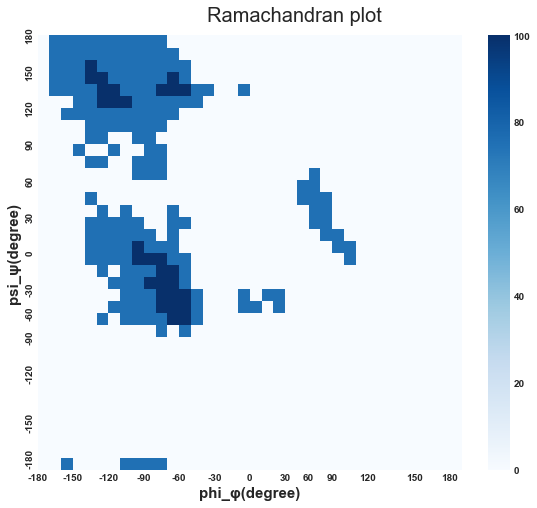

In [30]:
# Set default font of the whole figure.
font = {'family':'Arial', 'weight':'bold', 'size':10}
matplotlib.rc('font',**font)
# Generate class fig and ax.
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(9.5,8))

sns.heatmap(count_matric,cmap="Blues")

ax.set_xlabel('phi_φ(degree)',fontname='Arial',size=15,fontweight='bold')
ax.set_ylabel('psi_ψ(degree)',fontname='Arial',size=15,fontweight='bold')

xlabel = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
ylabel = [180,150,120,90,60,30,0,-30,-60,-90,-120,-150,-180]
ax.set_xticks([0,3,6,9,12,15,18,21,23,25,28,32,35])
ax.set_yticks([0,3,6,9,12,15,18,21,23,25,28,32,35])
ax.set_xticklabels(xlabel)
ax.set_yticklabels(ylabel)

ax.set_xlabel('phi_φ(degree)',fontname='Arial',size=15,fontweight='bold')
ax.set_ylabel('psi_ψ(degree)',fontname='Arial',size=15,fontweight='bold')
fig.suptitle('Ramachandran plot',fontsize=20,y=0.93)

fig.savefig('D://CORE_plot.png',dpi=600,bbbox_inches='tight')

#### heatmap for clean_matric

In [53]:
clean_matric = np.array(df_count)
clean_matric[clean_matric>=100] = 100
clean_matric[(clean_matric>=8) & (clean_matric<100)] = 75
clean_matric[clean_matric == -2] = 30
clean_matric[(clean_matric>=0) & (clean_matric<8)] = 0 

D:\system\TEMP/ipykernel_22040/2512538738.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('D://GENEROUS_plot.png',dpi=600,bbbox_inches='tight')


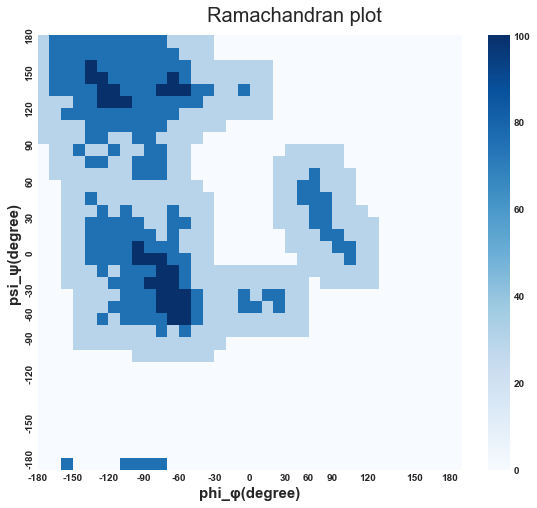

In [54]:
# Set default font of the whole figure.
font = {'family':'Arial', 'weight':'bold', 'size':10}
matplotlib.rc('font',**font)
# Generate class fig and ax.
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(9.5,8))

sns.heatmap(clean_matric,cmap="Blues")

ax.set_xlabel('phi_φ(degree)',fontname='Arial',size=15,fontweight='bold')
ax.set_ylabel('psi_ψ(degree)',fontname='Arial',size=15,fontweight='bold')

xlabel = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
ylabel = [180,150,120,90,60,30,0,-30,-60,-90,-120,-150,-180]
ax.set_xticks([0,3,6,9,12,15,18,21,23,25,28,32,35])
ax.set_yticks([0,3,6,9,12,15,18,21,23,25,28,32,35])
ax.set_xticklabels(xlabel)
ax.set_yticklabels(ylabel)

ax.set_xlabel('phi_φ(degree)',fontname='Arial',size=15,fontweight='bold')
ax.set_ylabel('psi_ψ(degree)',fontname='Arial',size=15,fontweight='bold')
fig.suptitle('Ramachandran plot',fontsize=20,y=0.93)

fig.savefig('D://GENEROUS_plot.png',dpi=600,bbbox_inches='tight')